# 1. Importing the libraries

In [123]:
# %pip install --user --upgrade --force-reinstall 'numpy<2' pandas scipy scikit-learn imbalanced-learn


In [124]:
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

from warnings import filterwarnings
filterwarnings("ignore")

# 2. Data Loading

In [125]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3. Pre-Processing

In [126]:
df.shape

(7043, 21)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [128]:
# Check for statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [129]:
# Convert `TotalCharges` to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [130]:
# Check datatype of a column
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [131]:
df.isnull().sum() / len(df) * 100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

## Impute Missing values in `TotalCharges` column

In [132]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [133]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [134]:
df.duplicated().sum()

0

In [135]:
# Check for unique values in categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in gender: ['Female' 'Male']
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in PhoneService: ['No' 'Yes']
Unique values in MultipleLines: ['No phone service' 'No' 'Yes']
Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values in TechSupport: ['No' 'Yes' 'No internet service']
Unique values in StreamingTV: ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies: ['No' 'Yes' 'No internet service']
Unique values in Contract: ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling: ['Yes' 'No']
Unique values in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank t

In [136]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [160]:
df['gender'].value_counts()

gender
1    3555
0    3488
Name: count, dtype: int64

# 4. Exploratory Data Analysis: `Univariate`, `Bivariate`, and `Multivariate` Analysis

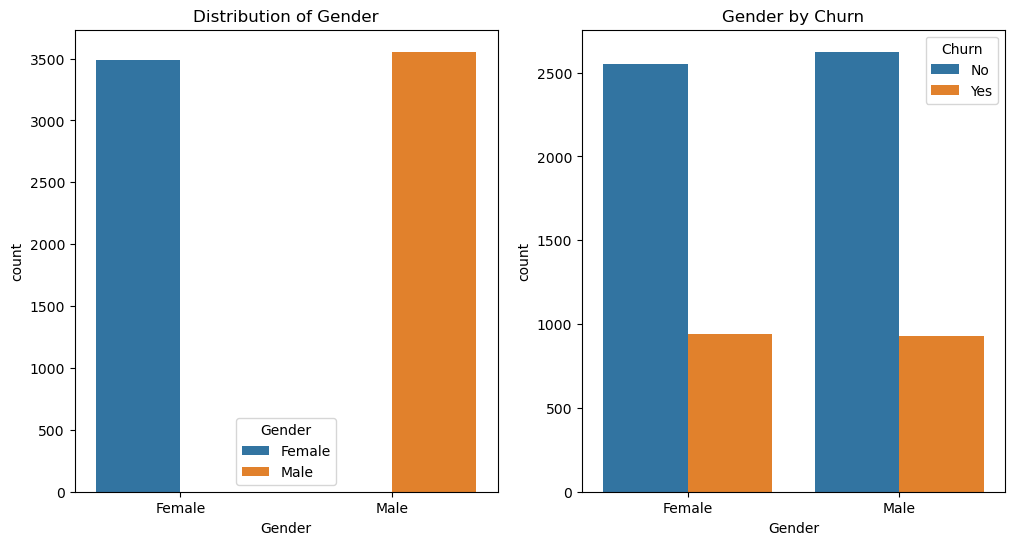

In [ ]:
# Visualize `gender`
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='gender', data=df, ax=ax[0], hue="gender")
ax[0].set_title("Distribution of Gender")
ax[0].set_xlabel("Gender")
ax[0].legend(title="Gender", labels=['Female', 'Male'])

sns.countplot(x='gender', hue='Churn', data=df, ax=ax[1])
ax[1].set_title("Gender by Churn")
ax[1].set_xlabel("Gender")
plt.show();

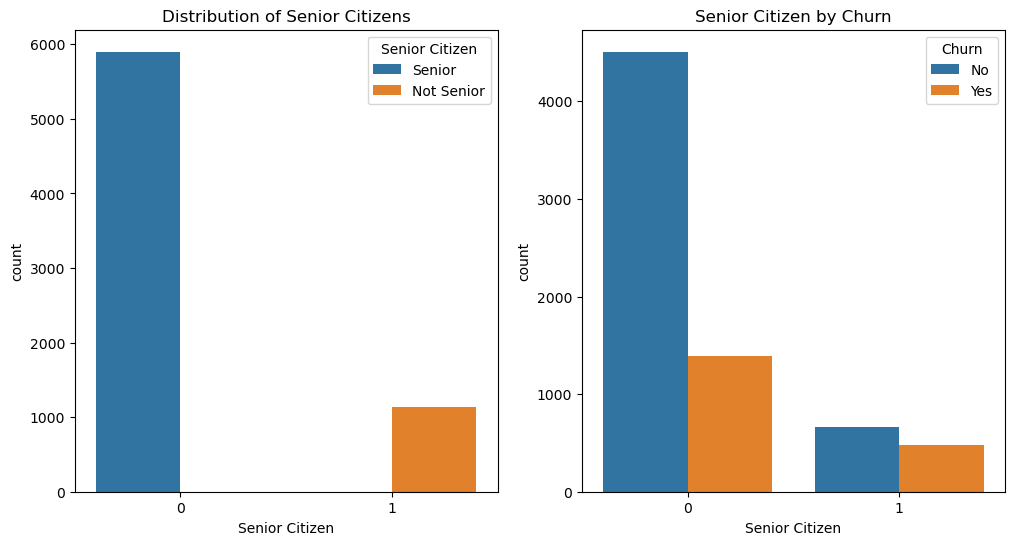

In [138]:
# Visualize SeniorCitizen
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='SeniorCitizen', data=df, ax=ax[0], hue="SeniorCitizen")
ax[0].set_title("Distribution of Senior Citizens")
ax[0].set_xlabel("Senior Citizen")
ax[0].legend(title="Senior Citizen", labels=['Senior', 'Not Senior'])

sns.countplot(x='SeniorCitizen', data=df, hue='Churn', ax=ax[1])
ax[1].set_title("Senior Citizen by Churn")
ax[1].set_xlabel("Senior Citizen")
plt.show();

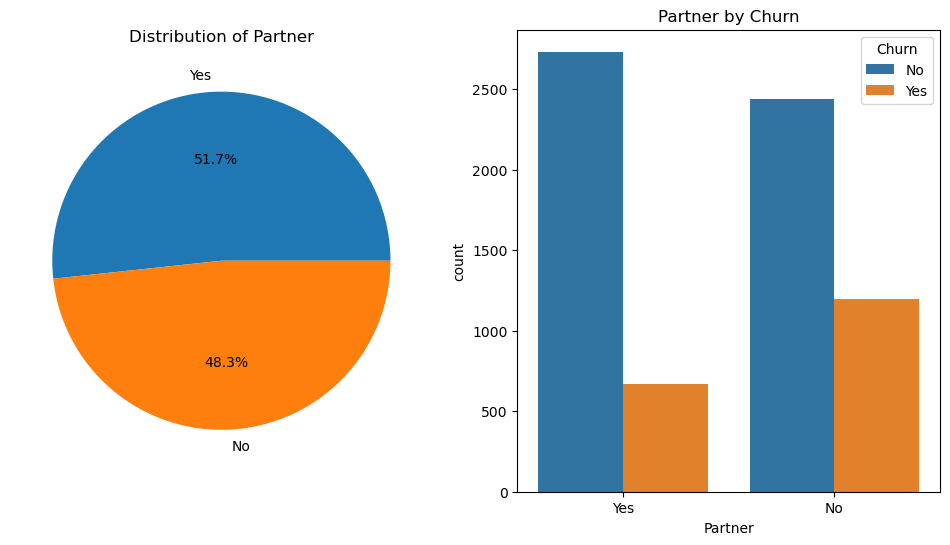

In [139]:
# Visualize `partner`
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# sns.countplot(x='Partner', data=df, ax=ax[0])
ax[0].pie(df["Partner"].value_counts(), labels=["Yes", "No"], autopct='%1.1f%%')
ax[0].set_title("Distribution of Partner")

sns.countplot(x='Partner', data=df, hue='Churn', ax=ax[1])
ax[1].set_title("Partner by Churn")
plt.show();

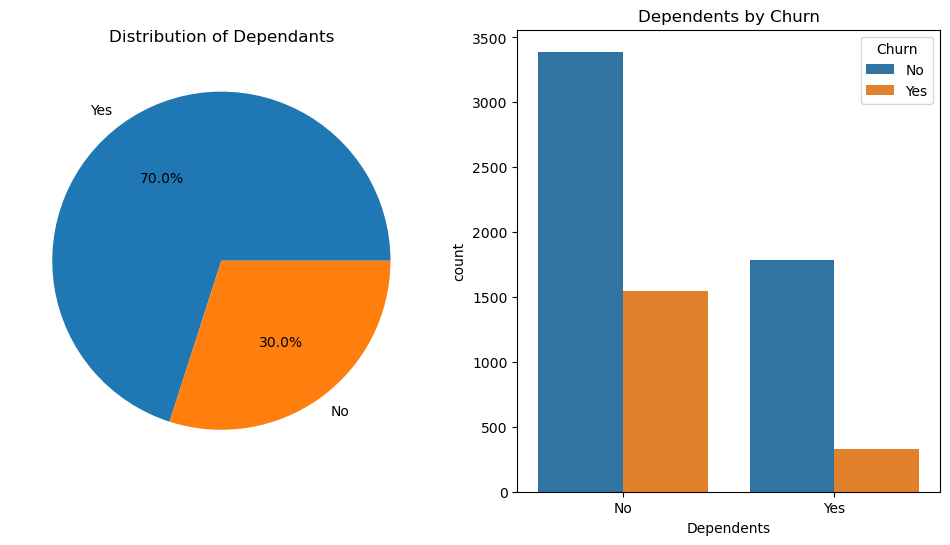

In [140]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# sns.countplot(x='Dependents', data=df, ax=ax[0])
ax[0].pie(df["Dependents"].value_counts(), labels=["Yes", "No"], autopct='%1.1f%%')
ax[0].set_title("Distribution of Dependants")

sns.countplot(x='Dependents', data=df, hue='Churn', ax=ax[1])
ax[1].set_title("Dependents by Churn")
plt.show();

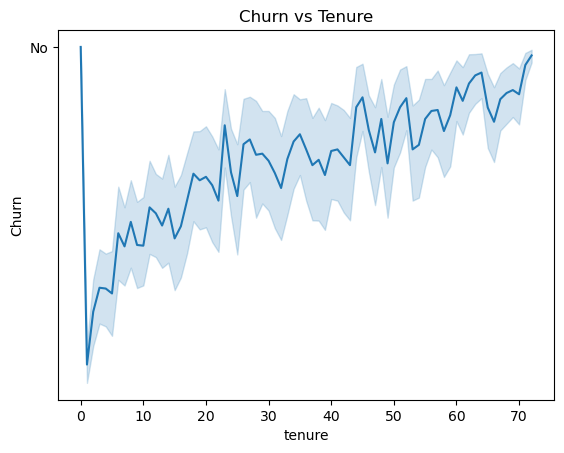

In [141]:
# Visualize `tenure`
sns.lineplot(data=df, x="tenure", y="Churn")
plt.title("Churn vs Tenure")
plt.show();

In [162]:
df['Contract'].value_counts() / len(df['Contract'])

Contract
0    0.550192
2    0.240664
1    0.209144
Name: count, dtype: float64

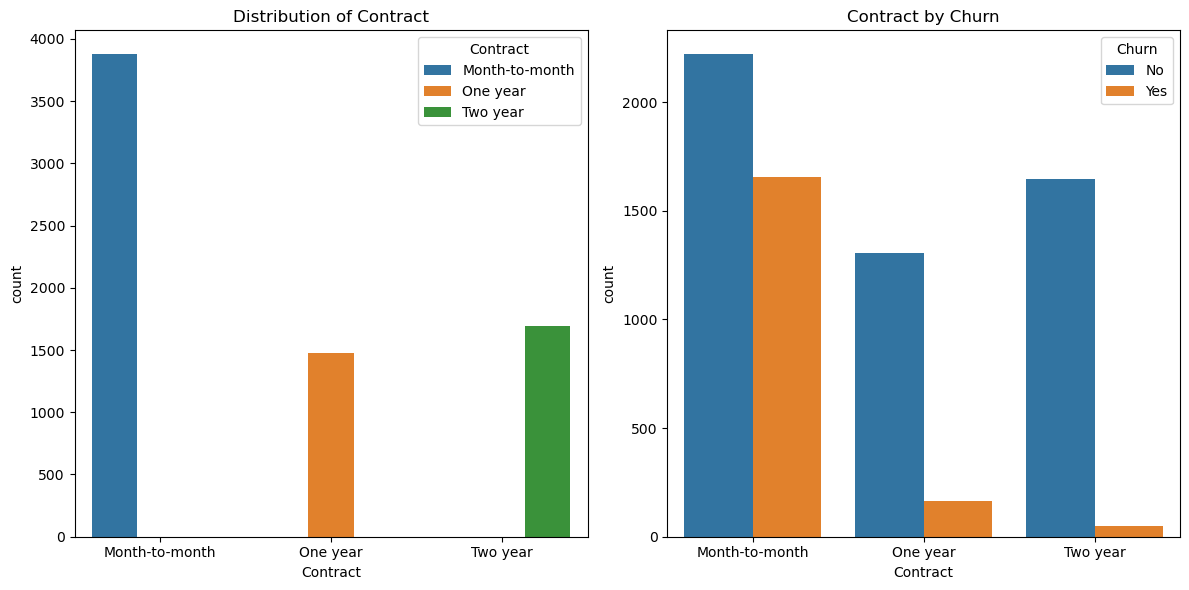

In [142]:
# Visualize `Contract`
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='Contract', data=df, ax=ax[0], hue="Contract")
ax[0].set_title("Distribution of Contract")
ax[0].legend(title="Contract", labels=['Month-to-month', 'One year', 'Two year'])
# ax[0].legend(title="Contract", hue="Contract")

sns.countplot(x='Contract', data=df, hue='Churn', ax=ax[1])
ax[1].set_title("Contract by Churn")
plt.tight_layout()
plt.show();

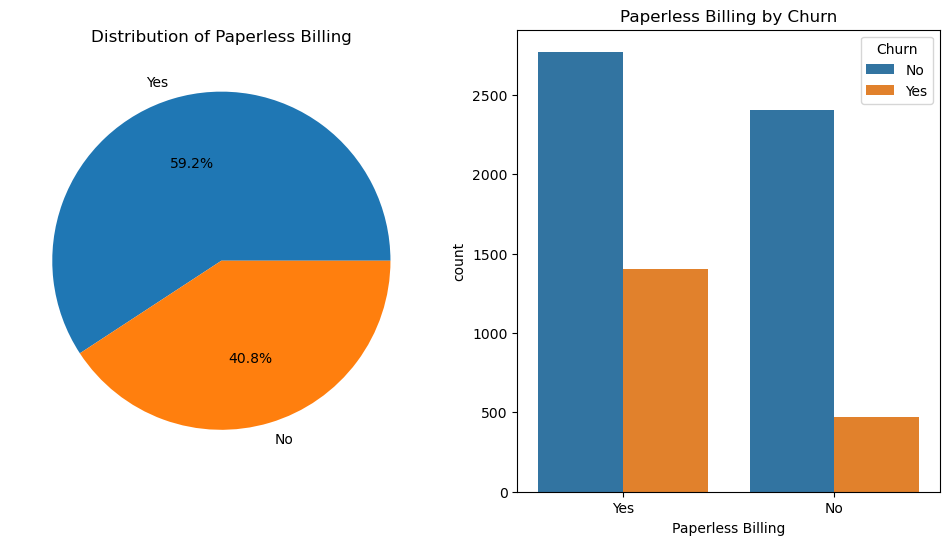

In [143]:
# Visualize `PaperlessBilling`
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].pie(df["PaperlessBilling"].value_counts(), labels=["Yes", "No"], autopct='%1.1f%%')
ax[0].set_title("Distribution of Paperless Billing")
# sns.countplot(x='PaperlessBilling', data=df, ax=ax[0])
sns.countplot(x='PaperlessBilling', data=df, hue='Churn', ax=ax[1])
plt.title("Paperless Billing by Churn")
plt.xlabel("Paperless Billing")
plt.show();

- 59.2% of customers preferred `Paperless Billing` compared to 40.8%.
- Customers utilizing `PaperlessBilling` are more likely to churn compared to non-users of `PaperlessBilling`.

In [144]:
df["PaymentMethod"].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

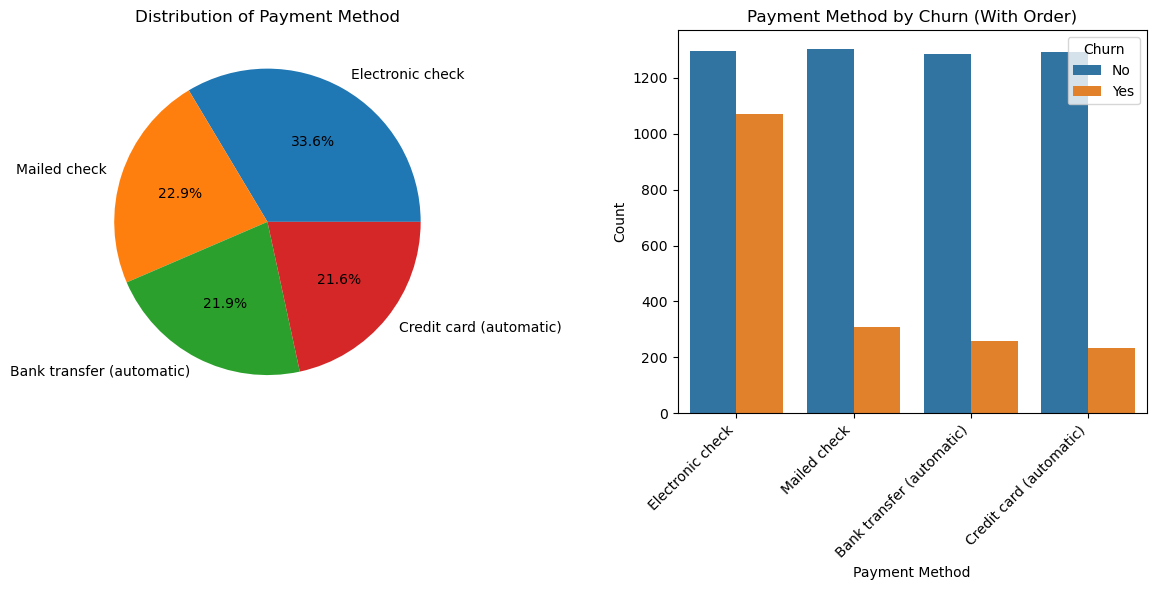

In [145]:
from colorama.ansi import set_title
# Visualize `PaymentMethod`
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
labels = ["Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"]
ax[0].pie(df["PaymentMethod"].value_counts(), labels=labels, autopct='%1.1f%%')
ax[0].set_title("Distribution of Payment Method")

# 
sns.countplot(x='PaymentMethod', data=df, hue='Churn', ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
ax[1].set_title('Payment Method by Churn (With Order)')
ax[1].set_xlabel('Payment Method')
ax[1].set_ylabel("Count")
plt.tight_layout()
plt.show();

- Majority of customers preferred `Electronic check (33.6%)`, followed by `Mailed check 22.9%`, `Bank transfer (automatic) 21.9%`, and `Credit card (automatic) 21.6%` respectively.
- Majority of customers who used `Electronic check` payment were highly likely to churn compared to the rest payment method.

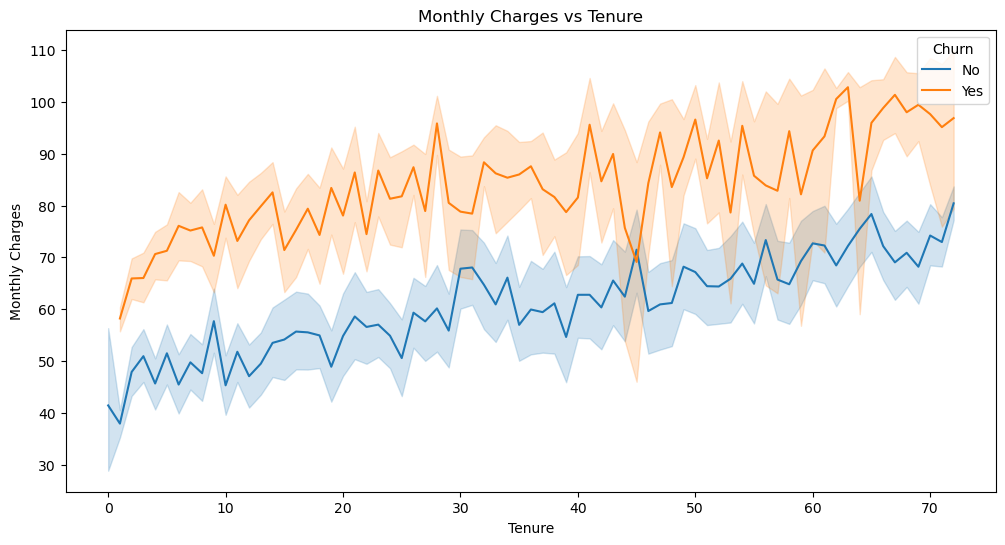

In [146]:
# Visualize `MonthlyCharges`
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')
plt.title("Monthly Charges vs Tenure")
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.show();

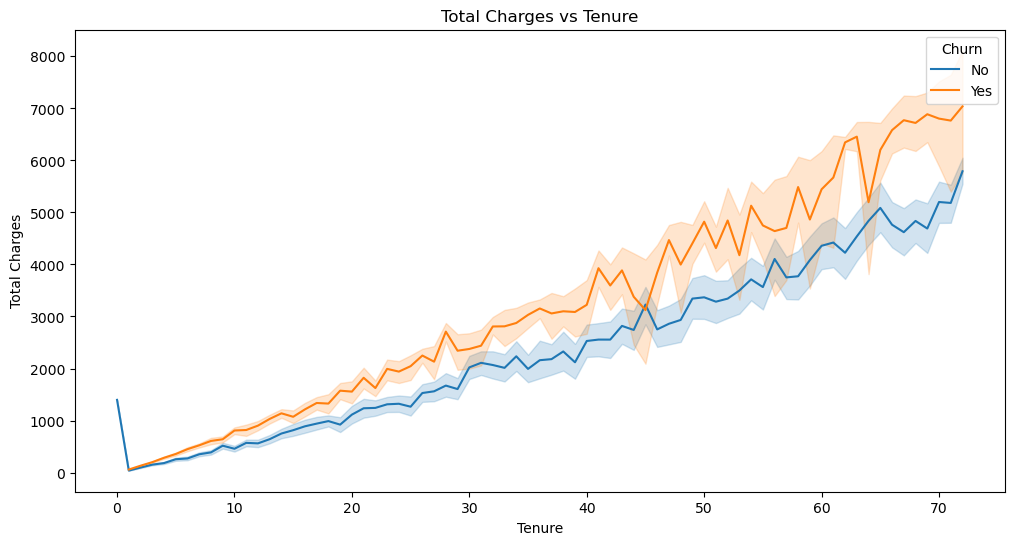

In [147]:
# Visualize `TotalCharges`
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='tenure', y='TotalCharges', hue='Churn')
plt.title("Total Charges vs Tenure")
plt.xlabel("Tenure")
plt.ylabel("Total Charges")
plt.show();

In [148]:
df["MonthlyCharges"].corr(df["TotalCharges"]) * 100

65.08643497230398

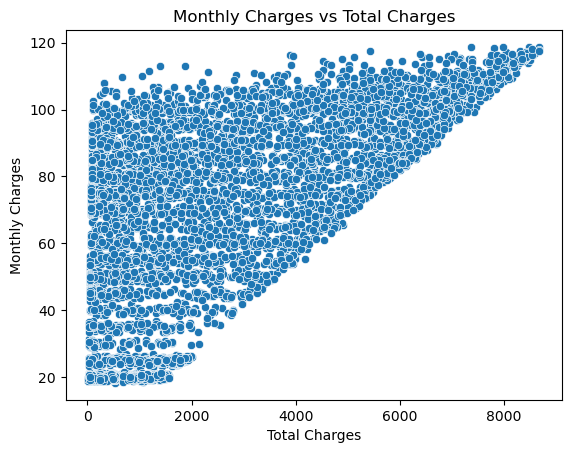

In [149]:
# Visualize `MonthlyCharges` vs `TotalCharges`
sns.scatterplot(y='MonthlyCharges', x='TotalCharges', data=df)
plt.title('Monthly Charges vs Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Monthly Charges')
plt.show();

# 5. Feature Engineering

In [150]:
# Convert categorical variables to numeric
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [151]:
# Confirm that the data has been successfully converted to numerical data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [152]:
df["Churn"].corr(df["tenure"])

-0.3522286701130777

In [153]:
df.drop('customerID', axis=1, inplace=True)

# 6. Split the Data into `Train` and `Test`

In [154]:
# Declare `X` and `y` variables
X = df.drop('Churn', axis=1)
y = df['Churn']

# Resample to handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
print(f"{X_res.value_counts()} and {y_res.value_counts()}")

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)



gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges
1       0              0        0           1       1             0              2                1               1             1                 1            1            1                0         0                 3              20.200000       20.200000       4
0       0              0        0           1       1             0              1                0               0             0                 0            0            0                0         1                 2              69.200000       69.200000       4
1       0              0        0           1       1             0              2                1               1             1                 1            1            1                0         1       

# 7. Model `Building` and `Training` 


In [155]:
# Instatiate the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

# Train the models
for model_name, model in models.items():
    model.fit(X_train, y_train)


## Feature Importance

In [156]:
importances = model.feature_importances_
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)
print(feat_imp)

             Feature  Importance
17    MonthlyCharges    0.143964
18      TotalCharges    0.140903
14          Contract    0.138303
4             tenure    0.115941
8     OnlineSecurity    0.080868
11       TechSupport    0.077557
16     PaymentMethod    0.041559
9       OnlineBackup    0.037308
3         Dependents    0.029820
10  DeviceProtection    0.028435
2            Partner    0.025933
7    InternetService    0.025773
0             gender    0.021598
6      MultipleLines    0.019412
15  PaperlessBilling    0.018776
13   StreamingMovies    0.017098
12       StreamingTV    0.016393
1      SeniorCitizen    0.013602
5       PhoneService    0.006758


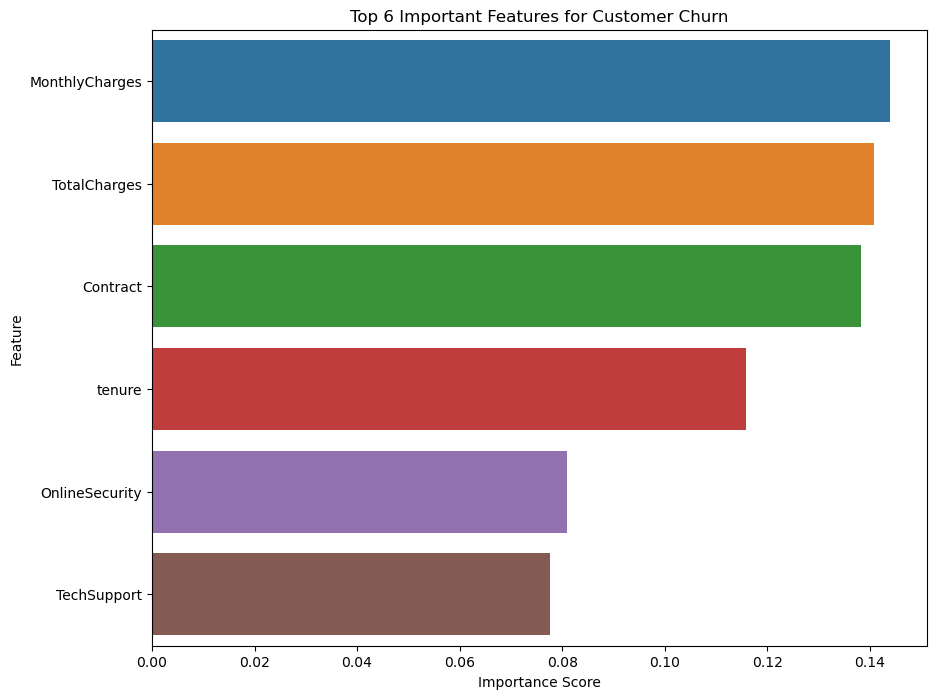

In [157]:
# Plot `feature_importance`
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(6))
plt.title('Top 6 Important Features for Customer Churn')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show();

- `MonthlyCharges`, `TotalCharges`, `Contract`, `tenure`, `TechSupport`, and `OnlineSecurity` features drive churn.

# 8. Model `Evaluation`

In [158]:
# Evaluate the models
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    # Predict probablities
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    
    # Print metrics
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\n")

Model: Logistic Regression
Accuracy: 0.8106
Precision: 0.7995
Recall: 0.8360
F1 Score: 0.8173
ROC AUC: 0.8866


Model: Random Forest
Accuracy: 0.8580
Precision: 0.8654
Recall: 0.8522
F1 Score: 0.8588
ROC AUC: 0.9287




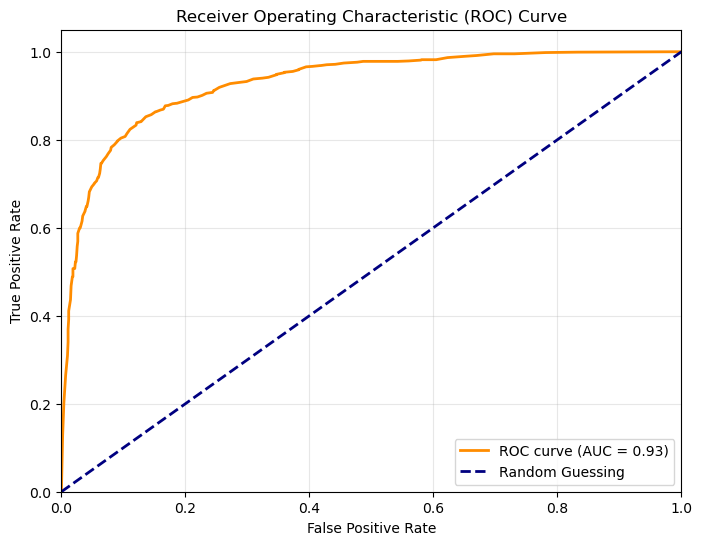

In [159]:
# Plot `ROC AUC` curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show();

- The ROC curve above shows the percentage of actual churners correctly classified as churners.